# Breast Cancer Detection 



### Import ML packages

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns

%matplotlib inline

## Exploratory Analysis

### Read and load Dataset

In [74]:
# Load Data
df = pd.read_csv('D:\Project\Breast cancer prediction\data.csv')
df.head(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [75]:
#Shape of the Dataset
df.shape

(699, 11)

In [76]:
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Data pre-processing

In [77]:
# Droping the id cloumn which is of no use
df.drop('id', axis=1, inplace=True)

In [78]:
# Columns in the dataset
df.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

## Encoding Categorical Data

In [79]:
#Enumerate the diagnosis column such that M = 1, B = 0 
df['class'] = df['class'].replace([2,4],[0,1])
df['class'] = df['class'].astype("int64")

In [80]:
#The number of Benign and Maglinant cases from the dataset.
print(df.groupby('class').size())

class
0    458
1    241
dtype: int64


In [81]:
df.head(10)

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [83]:
df[df['bare_nucleoli'] == '?']

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,1
40,6,6,6,9,6,?,7,8,1,0
139,1,1,1,1,1,?,2,1,1,0
145,1,1,3,1,2,?,2,1,1,0
158,1,1,2,1,3,?,1,1,1,0
164,5,1,1,1,2,?,3,1,1,0
235,3,1,4,1,2,?,3,1,1,0
249,3,1,1,1,2,?,3,1,1,0
275,3,1,3,1,2,?,2,1,1,0
292,8,8,8,1,2,?,6,10,1,1


In [84]:
df[df['bare_nucleoli'] == '?'].sum()

clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                               2
dtype: object

In [85]:
digits_in_bare_nucleoli = pd.DataFrame(df.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [86]:
df = df.replace('?', np.nan)
df['bare_nucleoli'].head(24)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23    NaN
Name: bare_nucleoli, dtype: object

In [87]:
df.median()

clump_thickness      4.0
size_uniformity      1.0
shape_uniformity     1.0
marginal_adhesion    1.0
epithelial_size      2.0
bare_nucleoli        1.0
bland_chromatin      3.0
normal_nucleoli      1.0
mitoses              1.0
class                0.0
dtype: float64

In [88]:
df = df.fillna(df.median())

In [89]:
df['bare_nucleoli'].head(25)

0      1
1     10
2      2
3      4
4      1
5     10
6     10
7      1
8      1
9      1
10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     1
24     1
Name: bare_nucleoli, dtype: object

In [90]:
df.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [91]:
df['bare_nucleoli']=df['bare_nucleoli'].astype('int64') #we must do the conversion explicitly

In [92]:
df.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [93]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count[0:10]# Converting object into Nan and into int value

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

## Data Visualization

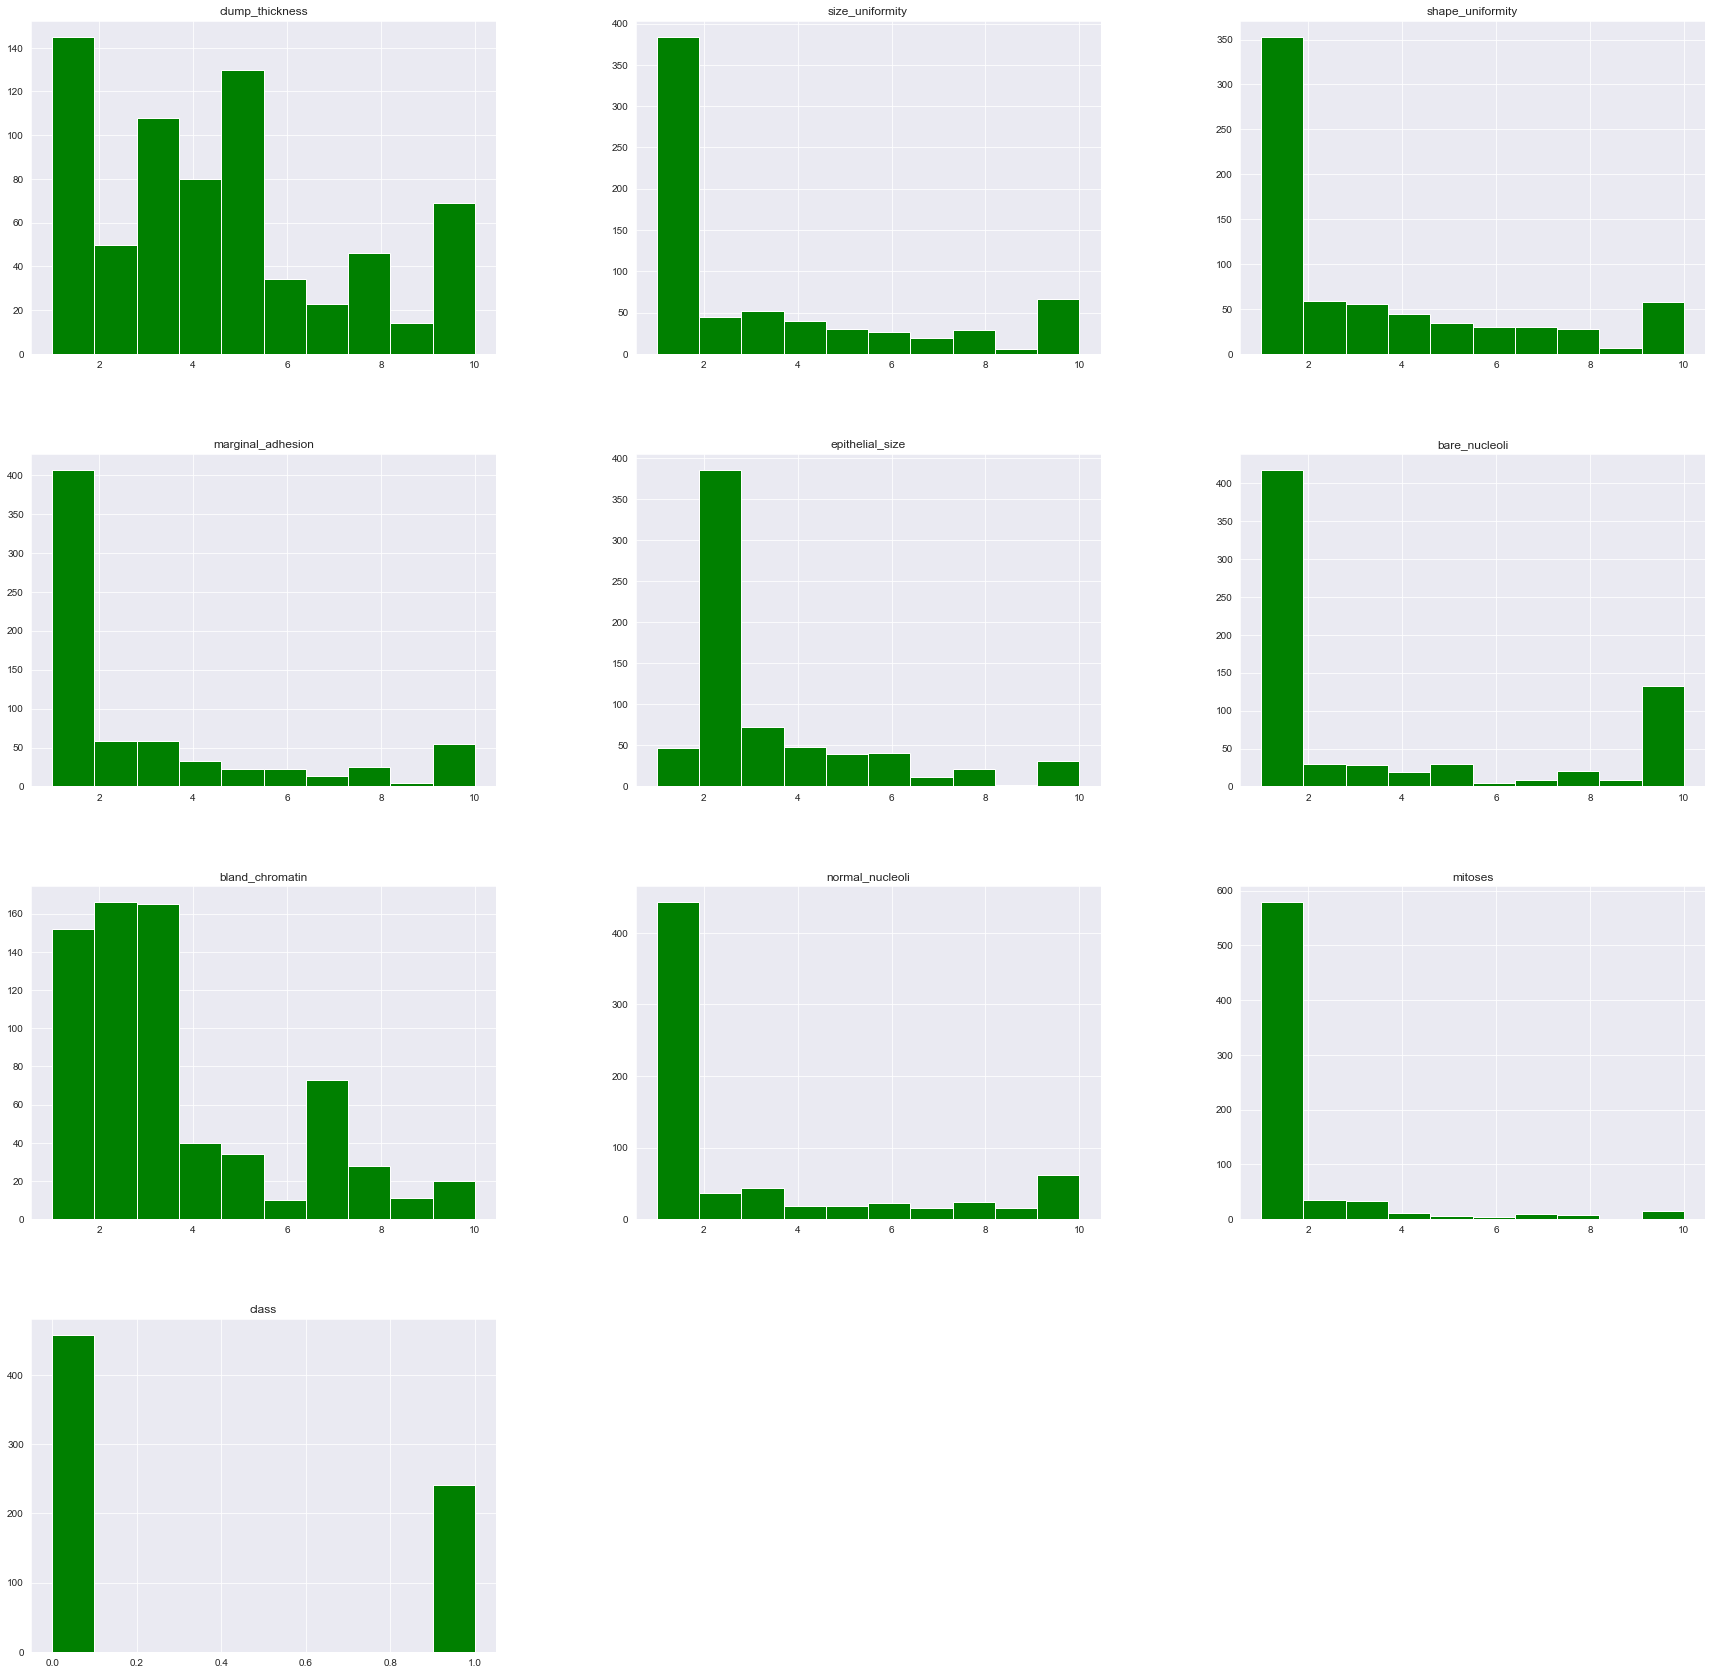

In [94]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30), color="Green")
plt.show()

## Feature selection

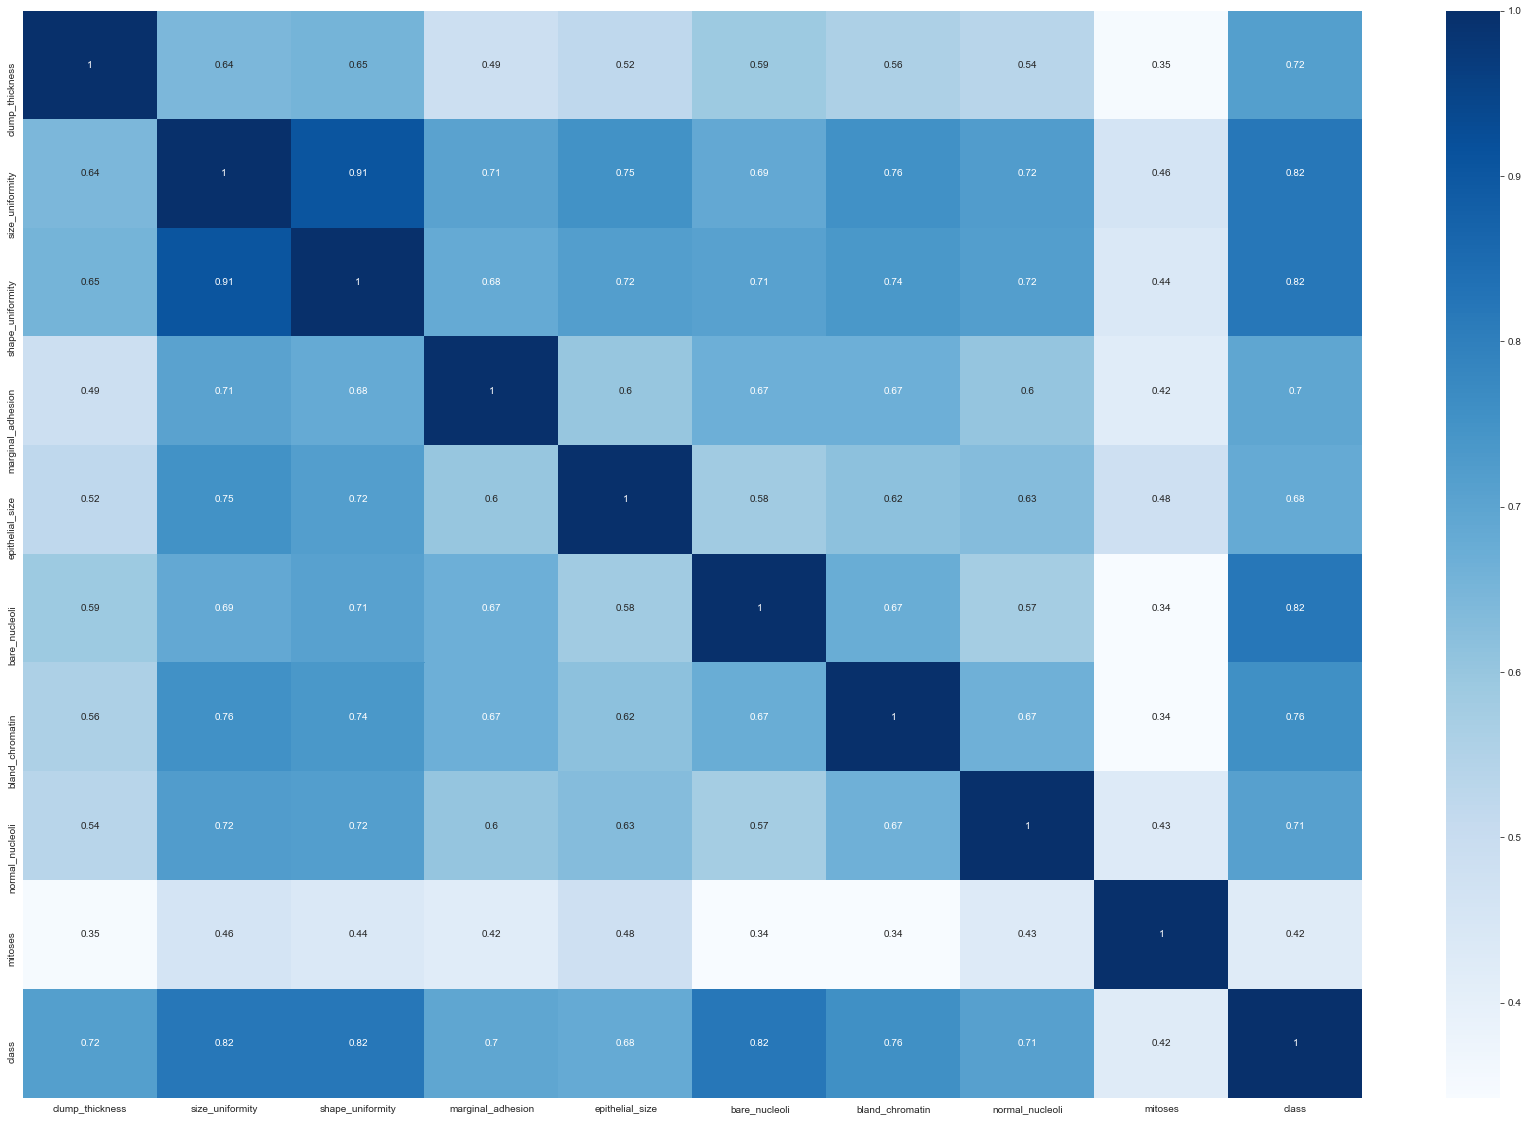

In [95]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [96]:
#Correlation with output variable
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [97]:
#Selecting highly correlated features
corr_features = correlation(df, 0.7)
len(set(corr_features))

7

In [98]:
corr_features

{'bare_nucleoli',
 'bland_chromatin',
 'class',
 'epithelial_size',
 'marginal_adhesion',
 'normal_nucleoli',
 'shape_uniformity'}

## Train and Test Model

In [99]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['class'].values
X = df.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state=1)

In [100]:
X_train.shape

(489, 9)

In [101]:
X_test.shape

(210, 9)

## Model Selection
### Baseline algorithm checking

* Analyse and build a model to predict if a given set of symptoms lead to breast cancer. This is a binary classification problem, and a few algorithms are appropriate for use. 

* As we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform. 

* We will use 10 fold cross validation for each testing.

* The following non-linear algorithms will be used, namely: 
  * Classification and Regression Trees (CART) 
  * Linear Support Vector Machines (SVM)
  * Gaussian Naive Bayes (NB) 
  * k-Nearest Neighbors (KNN).

In [102]:
# Testing Options
scoring = 'accuracy'

In [103]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model:Mean accuracy is 0.934439 (Std accuracy is 0.063336)
For SVM Model:Mean accuracy is 0.957058 (Std accuracy is 0.030879)
For NB Model:Mean accuracy is 0.957015 (Std accuracy is 0.021420)
For KNN Model:Mean accuracy is 0.961139 (Std accuracy is 0.035880)


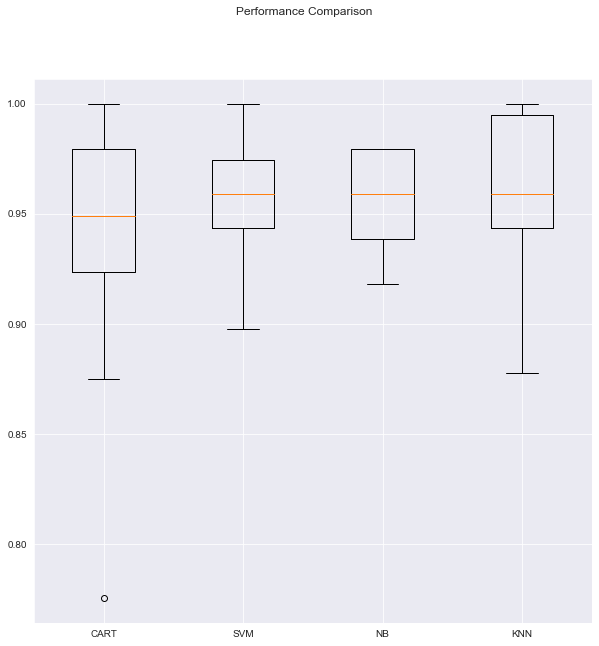

In [104]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial run, it looks like CART, SVM, GaussianNB and KNN  performed the best with  above 90% mean accuracy.


## Evaluation of algorithm on Standardised Data

Using pipelines to improve the performance of all machine learning algorithms by using standardised dataset  The improvement is likely for all the models. 

In [105]:
# Standardize the dataset
import warnings
pipelines = []

pipelines.append(('Scaled CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('Scaled NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

kfold = KFold(n_splits= 10)
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print( "For %s Model: Mean Accuracy is %f (Std Accuracy is %f)" % (name, cv_results.mean(), cv_results.std()))

For Scaled CART Model: Mean Accuracy is 0.932440 (Std Accuracy is 0.053399)
For Scaled SVM Model: Mean Accuracy is 0.952934 (Std Accuracy is 0.028999)
For Scaled NB Model: Mean Accuracy is 0.957015 (Std Accuracy is 0.021420)
For Scaled KNN Model: Mean Accuracy is 0.959099 (Std Accuracy is 0.036508)


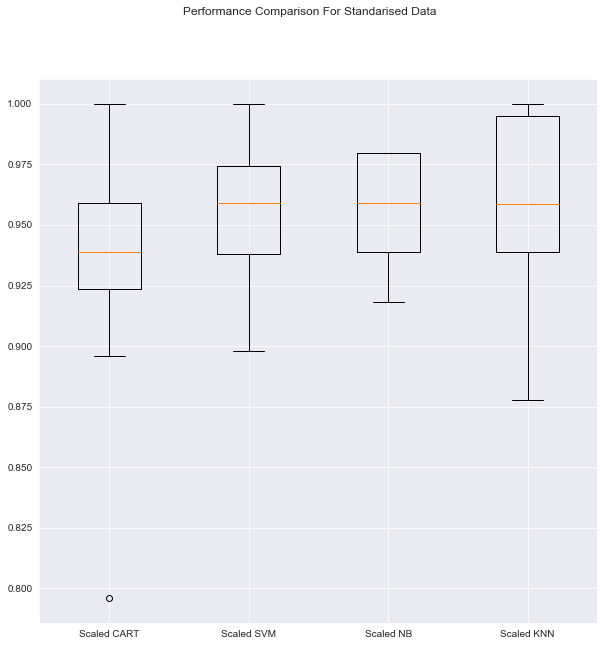

In [106]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison For Standarised Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [107]:
# Make predictions on validation dataset


for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


Model: CART
Accuracy score: 0.9380952380952381
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       137
           1       0.93      0.89      0.91        73

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210


Model: SVM
Accuracy score: 0.9809523809523809
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210


Model: NB
Accuracy score: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       137
           1       0.94 